In [21]:
# K-Means Clustering Analysis for Machine Sensor Data
# Smart Manufacturing IoT Sensor Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

In [23]:

# 1. Load the dataset
print("Task 1: Loading the dataset")
df = pd.read_csv('/Users/maazhussain/Downloads/machine.csv')
print("Dataset loaded successfully!\n")

Task 1: Loading the dataset
Dataset loaded successfully!



Task 2: Exploring the dataset
Dataset Shape: (10, 3)

First 5 rows of the dataset:
  MachineID  VibrationIntensity  OperatingTemperature
0        M1                 0.4                    60
1        M2                 0.5                    65
2        M3                 0.3                    58
3        M4                 1.8                    80
4        M5                 1.9                    85

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MachineID             10 non-null     object 
 1   VibrationIntensity    10 non-null     float64
 2   OperatingTemperature  10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes
None

Descriptive Statistics:
       VibrationIntensity  OperatingTemperature
count           10.000000             10.000000
mean             1.250

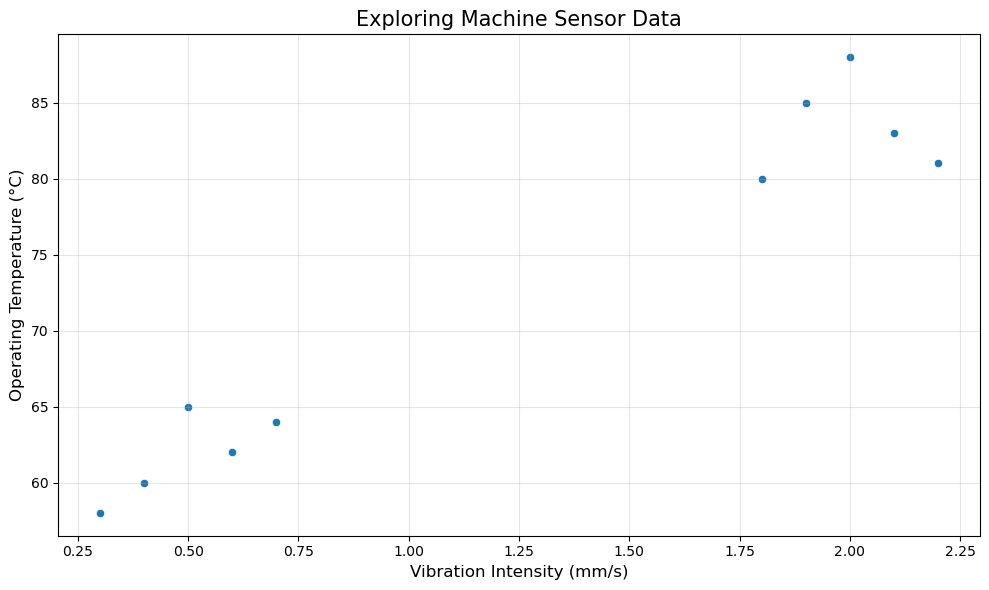

In [25]:
# 2. Explore the dataset
print("Task 2: Exploring the dataset")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())


plt.figure(figsize=(10, 6))
sns.scatterplot(x='VibrationIntensity', y='OperatingTemperature', data=df)
plt.title('Exploring Machine Sensor Data', fontsize=15)
plt.xlabel('Vibration Intensity (mm/s)', fontsize=12)
plt.ylabel('Operating Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()


Task 3: Creating 2D scatter plot of raw data


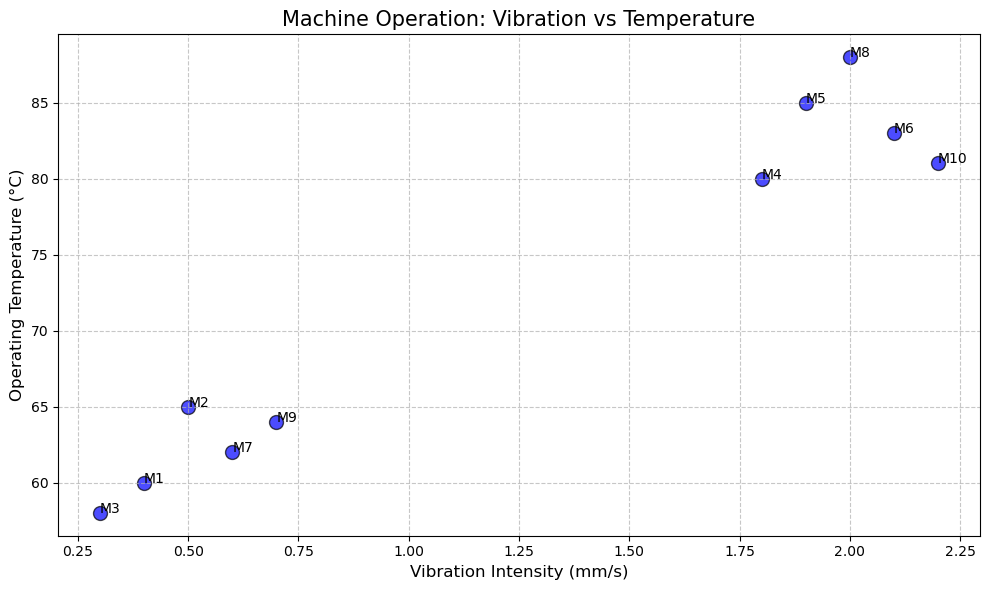

In [27]:
# 3. Plot 2D clustering based on Vibration Intensity and Operating Temperature
print("\nTask 3: Creating 2D scatter plot of raw data")
plt.figure(figsize=(10, 6))
plt.scatter(df['VibrationIntensity'], df['OperatingTemperature'], 
            s=100, c='blue', alpha=0.7, edgecolors='k')

for i, txt in enumerate(df['MachineID']):
    plt.annotate(txt, 
                (df['VibrationIntensity'].iloc[i], df['OperatingTemperature'].iloc[i]),
                fontsize=10)

plt.title('Machine Operation: Vibration vs Temperature', fontsize=15)
plt.xlabel('Vibration Intensity (mm/s)', fontsize=12)
plt.ylabel('Operating Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('raw_data_2d_plot.png')
plt.show()


Task 4: Finding optimal K using Elbow Method


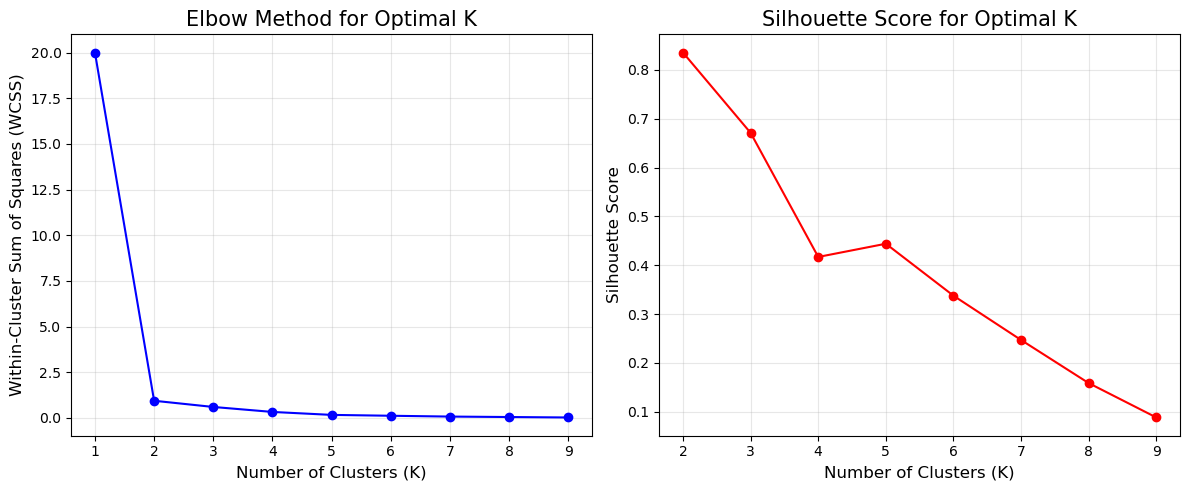

Elbow Method Results:
WCSS values: [20.0, 0.9399293873082615, 0.6004892971439832, 0.32793311862572383, 0.16623439113968957, 0.11898487681531505, 0.07412256602812607, 0.0494150440187507, 0.024707522009375354]
Silhouette scores: [0.8352833147926677, 0.6709071907211802, 0.41689059506910314, 0.4439496114318704, 0.33757389295407714, 0.24683558243788933, 0.15861698784900366, 0.08827445153900354]

Based on the elbow method and silhouette scores, determine the optimal K.
Looking at the plots, we need to find where the curve bends (elbow point).


In [33]:
# 4. Find the optimal value of K using the Elbow Method
print("\nTask 4: Finding optimal K using Elbow Method")

# Prepare data for clustering
X = df[['VibrationIntensity', 'OperatingTemperature']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
silhouette_scores = []
K_range = range(1, 10)  # Try K from 1 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    if k >= 2:
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))
    else:
        silhouette_scores.append(0)

# Plot the Elbow Method results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores[1:], marker='o', linestyle='-', color='r')
plt.title('Silhouette Score for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(2, 10))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_method.png')
plt.show()

print("Elbow Method Results:")
print("WCSS values:", wcss)
print("Silhouette scores:", silhouette_scores[1:])
print("\nBased on the elbow method and silhouette scores, determine the optimal K.")
print("Looking at the plots, we need to find where the curve bends (elbow point).")


optimal_k = 2

In [35]:
# 5. Apply K-Means Clustering using the identified value of K
print("\nTask 5: Applying K-Means with the optimal K =", optimal_k)

# Applying K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the dataframe
df['Cluster'] = cluster_labels


centers = scaler.inverse_transform(kmeans.cluster_centers_)

print(f"Applied K-Means clustering with K={optimal_k}")
print("\nCluster Centers (in original scale):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: Vibration={center[0]:.2f} mm/s, Temperature={center[1]:.2f}°C")

print("\nNumber of machines in each cluster:")
print(df['Cluster'].value_counts().sort_index())


Task 5: Applying K-Means with the optimal K = 2
Applied K-Means clustering with K=2

Cluster Centers (in original scale):
Cluster 0: Vibration=2.00 mm/s, Temperature=83.40°C
Cluster 1: Vibration=0.50 mm/s, Temperature=61.80°C

Number of machines in each cluster:
Cluster
0    5
1    5
Name: count, dtype: int64



Task 6: Plotting final clusters with centroids


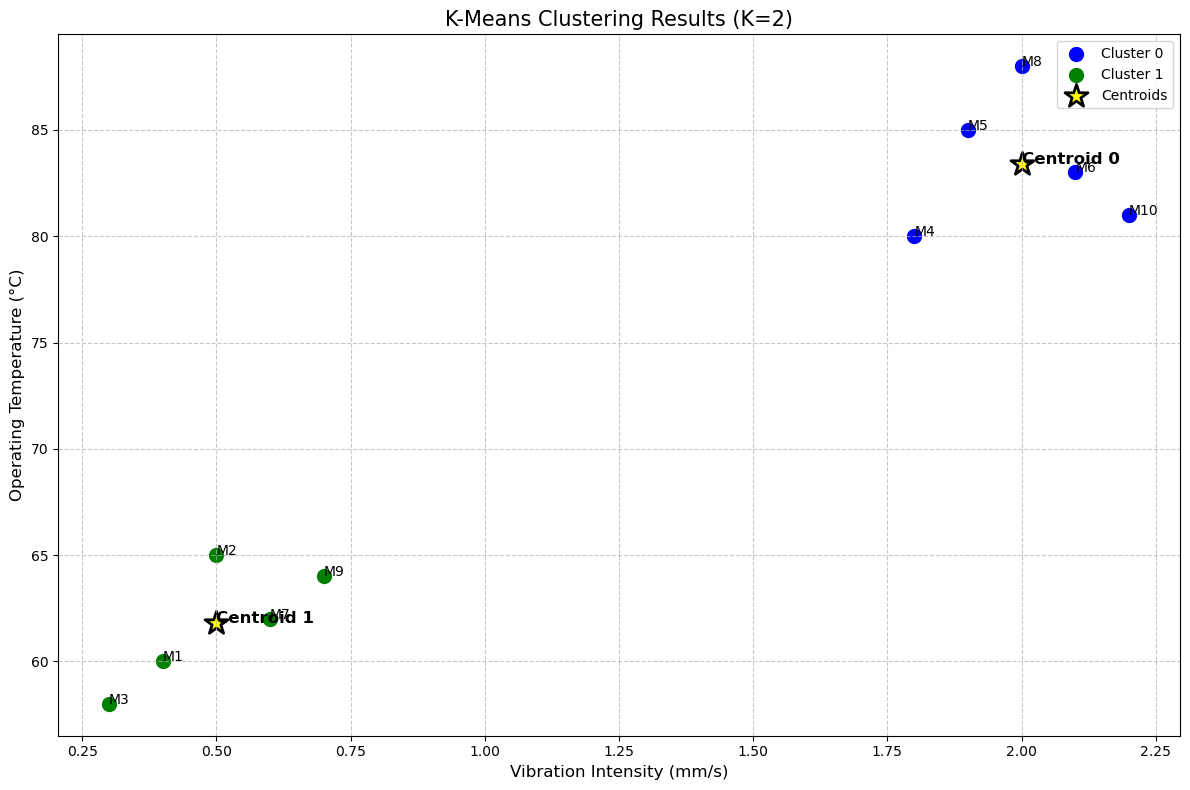

In [37]:
# 6. Plot the final clusters along with centroids
print("\nTask 6: Plotting final clusters with centroids")

plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['VibrationIntensity'], 
                cluster_data['OperatingTemperature'],
                s=100, 
                color=colors[cluster],
                label=f'Cluster {cluster}')

    
    for i, txt in enumerate(cluster_data['MachineID']):
        plt.annotate(txt, 
                    (cluster_data['VibrationIntensity'].iloc[i], 
                    cluster_data['OperatingTemperature'].iloc[i]),
                    fontsize=10)

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], 
            s=300, c='yellow', marker='*', 
            edgecolor='black', linewidth=2, 
            label='Centroids')


for i, center in enumerate(centers):
    plt.annotate(f'Centroid {i}', 
                (center[0], center[1]), 
                fontsize=12, 
                fontweight='bold')

plt.title(f'K-Means Clustering Results (K={optimal_k})', fontsize=15)
plt.xlabel('Vibration Intensity (mm/s)', fontsize=12)
plt.ylabel('Operating Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('final_clusters.png')
plt.show()

**Interpretation of Clustering Results**

Based on the Elbow Method and Silhouette Scores, ***K=2*** was selected as the optimal number of clusters. This configuration provided the best balance between cluster separation and coherence, with a clear "elbow" in the WCSS curve and the highest silhouette score of 0.835 at K=2

After applying K-Means clustering with K=2, the algorithm grouped the ***10 machines*** into two distinct operational states, each containing five machines. The cluster centers revealed the following profiles:

Cluster 0: Machines with high vibration intensity (2.00 mm/s) and high operating temperatures (83.4°C) — indicating potential maintenance concerns or machines operating under high stress conditions.
Cluster 1: Machines with low vibration intensity (0.50 mm/s) and lower temperatures (61.8°C) — likely representing machines operating under normal conditions with optimal performance parameters.

This unsupervised learning approach successfully identified natural groupings in the machine data, providing management with actionable insights to implement targeted maintenance strategies. The company can now prioritize inspection and maintenance for machines in ***Cluster 0***, potentially preventing costly breakdowns while optimizing resource allocation.